In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
data = pd.read_csv(url)


In [3]:
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])


In [7]:
print(data.columns)


Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


In [8]:
print(data.head())


   age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0   19  27.900         0  16884.92400           1         0          0   
1   18  33.770         1   1725.55230           0         1          1   
2   28  33.000         3   4449.46200           0         1          1   
3   33  22.705         0  21984.47061           0         1          1   
4   32  28.880         0   3866.85520           0         1          1   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0           1                 0                 0                 0   
1           0                 0                 0                 1   
2           0                 0                 0                 1   
3           0                 0                 1                 0   
4           0                 0                 1                 0   

   region_southwest  
0                 1  
1                 0  
2                 0  
3                 0  
4                 

In [12]:
X = data.drop(columns=['charges'])  # Features
y = data['charges']  # Target variable


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])


In [16]:
model.compile(optimizer='adam', loss='mean_absolute_error')


In [17]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)


In [18]:
test_loss = model.evaluate(X_test_scaled, y_test)


9/9 [==============================] - 0s 3ms/step - loss: 2667.8079


In [19]:
print(f'Test Mean Absolute Error: {test_loss:.2f}')


Test Mean Absolute Error: 2667.81


In [20]:
predictions = model.predict(X_test_scaled)


9/9 [==============================] - 0s 2ms/step


In [21]:
import matplotlib.pyplot as plt


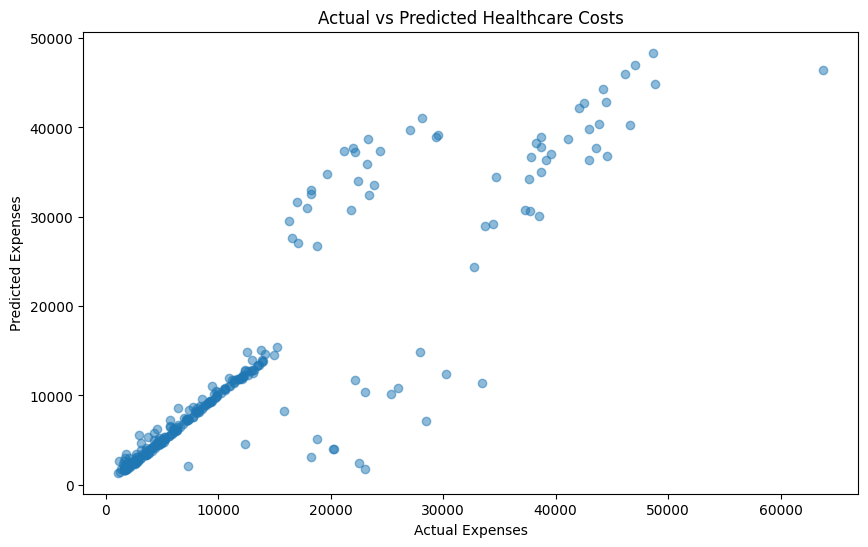

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.title('Actual vs Predicted Healthcare Costs')
plt.show()